# Clustering Crypto

In [84]:
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from path import Path

### Fetching Cryptocurrency Data

In [85]:
# Set the path
file_path = Path("Resources/crypto_data.csv")

# Create a DataFrame
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


### Data Preprocessing

In [86]:
# Keep only cryptocurrencies that are trading
crypto_df = crypto_df[crypto_df.IsTrading==True]

In [87]:
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [88]:
# Keep only cryptocurrencies with a working algorithm
crypto_df = crypto_df[crypto_df.Algorithm.notna()]

In [89]:
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [90]:
# Remove the "IsTrading" column
crypto_df = crypto_df.drop(columns="IsTrading")
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [91]:
# Remove rows with at least 1 null value
crypto_df.dropna(inplace=True)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [92]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df = crypto_df[crypto_df.TotalCoinsMined>0]
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [93]:
# Drop rows where there are 'N/A' text values
#crypto_df = crypto_df[(crypto_df['CoinName']!= "N/A") & (crypto_df['Algorithm']!="N/A") & (crypto_df['ProofType']!="N/A")]
crypto_df = crypto_df[crypto_df != 'N/A']

In [94]:
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [95]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
coin_name_df = pd.DataFrame(crypto_df["CoinName"])
coin_name_df.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [96]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df = crypto_df.drop(columns="CoinName")
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [97]:
# Create dummy variables for text features
X = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])
X.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# Standardize data
scaler = StandardScaler()
crypto_scaled = scaler.fit_transform(X)
crypto_scaled[0:5]

array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

### Reducing Dimensions Using PCA

In [99]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)
crypto_pca

array([[-0.31520599,  1.01308341, -0.5207212 ],
       [-0.29856578,  1.01320089, -0.52109025],
       [ 2.30188228,  1.66558906, -0.66384644],
       ...,
       [ 0.32270221, -2.29863919,  0.41150401],
       [-0.14765499, -1.88434956,  0.39120495],
       [-0.27674151,  0.80465665, -0.2527413 ]])

In [100]:
# Create a DataFrame with the principal components data
pcs_df = pd.DataFrame(
    data=crypto_pca,
    columns=['PC 1', 'PC 2', 'PC 3'],
    index=X.index
)
pcs_df.head(10)

,PC 1,PC 2,PC 3
42,-0.315206,1.013083,-0.520721
404,-0.298566,1.013201,-0.521090
1337,2.301882,1.665589,-0.663846
BTC,-0.153953,-1.320222,0.178467
ETH,-0.153767,-2.057800,0.333633
LTC,-0.149962,-1.142734,0.004207
DASH,-0.409009,1.279648,-0.488588
XMR,-0.154765,-2.249975,0.368860
ETC,-0.152212,-2.057909,0.333616
ZEC,-0.147654,-1.884350,0.391205


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [101]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
# Looping through k list
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

Running K-Means with `k=4`

**Create a new DataFrame including predicted clusters and cryptocurrencies features???**

In [102]:
# Initialize the K-Means model
km_model = KMeans(n_clusters=4, random_state=0)

# Fit the model
km_model.fit(pcs_df)

# Predict clusters
predictions = km_model.predict(pcs_df)

# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df = pd.concat([crypto_df, pcs_df], axis=1, join='inner')

In [103]:
clustered_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.315206,1.013083,-0.520721
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.298566,1.013201,-0.521090
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.301882,1.665589,-0.663846
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.153953,-1.320222,0.178467
ETH,Ethash,PoW,1.076842e+08,0,-0.153767,-2.057800,0.333633
...,...,...,...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000,2.481297,0.849997,-0.039263
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000,-0.313255,1.012956,-0.520744
BDX,CryptoNight,PoW,9.802226e+08,1400222610,0.322702,-2.298639,0.411504
ZEN,Equihash,PoW,7.296538e+06,21000000,-0.147655,-1.884350,0.391205


In [104]:
#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df['CoinName'] = coin_name_df["CoinName"]

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = km_model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.315206,1.013083,-0.520721,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.298566,1.013201,-0.521090,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.301882,1.665589,-0.663846,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.153953,-1.320222,0.178467,Bitcoin,3
ETH,Ethash,PoW,1.076842e+08,0,-0.153767,-2.057800,0.333633,Ethereum,3
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.149962,-1.142734,0.004207,Litecoin,3
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.409009,1.279648,-0.488588,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.154765,-2.249975,0.368860,Monero,3
ETC,Ethash,PoW,1.133597e+08,210000000,-0.152212,-2.057909,0.333616,Ethereum Classic,3
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.147654,-1.884350,0.391205,ZCash,3


### Visualizing Results

#### 3D-Scatter with Clusters

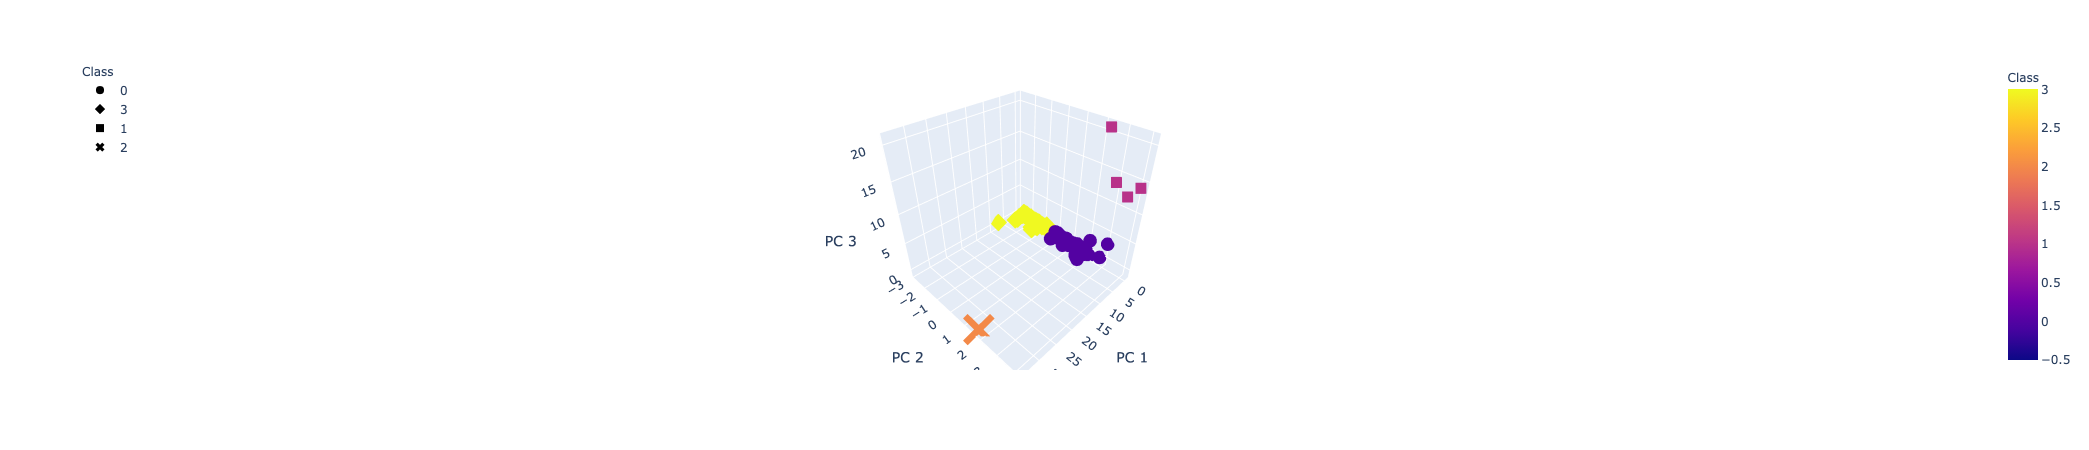

In [105]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    width=800,
    hover_name = "CoinName",
    hover_data = ["Algorithm"],
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#### Table of Tradable Cryptocurrencies

In [106]:
# Table with tradable cryptos
clustered_df.hvplot.table()

:Table   [Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class]

In [107]:
# Print the total number of tradable cryptocurrencies
print(f' There are a total of {clustered_df["CoinName"].count()} tradable cryptocurrencies')

 There are a total of 532 tradable cryptocurrencies


#### Scatter Plot with Tradable Cryptocurrencies

In [108]:
# Scale data to create the scatter plot
scaling_data = clustered_df.copy()
scaling_data_2 = scaling_data.drop(
    ["Algorithm", "ProofType","PC 1", "PC 2", "PC 3", "CoinName", "Class"], 
    axis=1
)
min_max = MinMaxScaler().fit_transform(scaling_data_2)
min_max

array([[0.00000000e+00, 4.20000000e-11],
       [1.06585544e-03, 5.32000000e-04],
       [2.95755135e-02, 3.14159265e-01],
       ...,
       [9.90135079e-04, 1.40022261e-03],
       [7.37028150e-06, 2.10000000e-05],
       [1.29582282e-07, 1.00000000e-06]])

In [109]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
min_max_df = pd.DataFrame(
    data=min_max,
    columns=["TotalCoinsMined", "TotalCoinSupply"],
    index=clustered_df.index
)

# Reorder columns
plot_df = min_max_df.reindex(columns=["TotalCoinSupply","TotalCoinsMined"])

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df["CoinName"] = coin_name_df["CoinName"]

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df["Class"] = clustered_df["Class"]

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,3
ETH,0.000000e+00,0.000109,Ethereum,3
LTC,8.400000e-05,0.000064,Litecoin,3
DASH,2.200000e-05,0.000009,Dash,0
XMR,0.000000e+00,0.000017,Monero,3
ETC,2.100000e-04,0.000115,Ethereum Classic,3
ZEC,2.100000e-05,0.000007,ZCash,3


In [110]:
plot_df.hvplot.scatter(
    x="TotalCoinsMined",
    y="TotalCoinSupply",
    by="Class",
    hover_cols=["CoinName"],
)

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)